# Exercises Part 1

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import seaborn as sns
from pydataset import data

iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 1. What does the distribution of petal lengths look like?

* It appears that many are of length 1 and another cluster was around 4-5

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

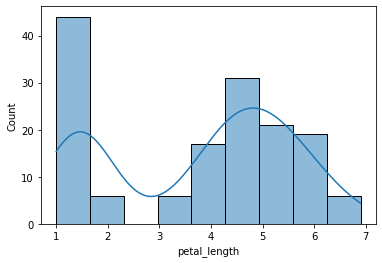

In [8]:
sns.histplot(iris.petal_length, kde=True)

### 2. Is there a correlation between petal length and petal width?

* There is a very strong correlation between petal length and width. 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


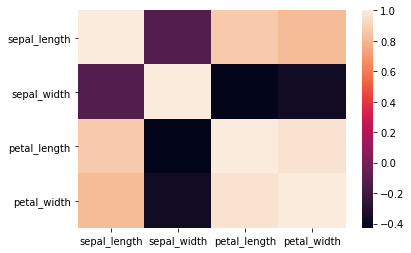

In [14]:
corr = iris.corr()
sns.heatmap(corr)
corr

### 3. Would it be reasonable to predict species based on sepal width and sepal length?

* It appears that it could be reasoned that you could predict the Setosa species with BOTH the length and width of the sepal with a reasonable accuracy. This is due to the data being distributed enough between the species when each factor is taken into account. However, the other two species (Versicolor & Virginica) seem to have a large degree of overlap which would make it difficult to detect species.

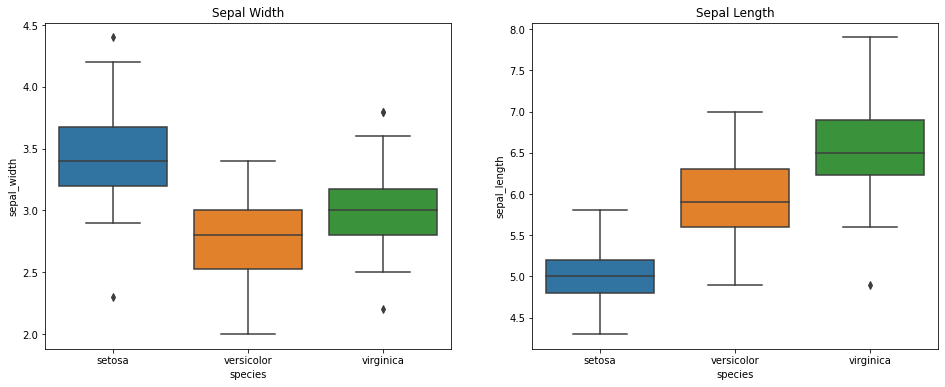

In [222]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
plt1 = sns.boxplot(x=iris.species, y=iris.sepal_width, ax=ax[0]).set_title(
'Sepal Width')
plt2 = sns.boxplot(x=iris.species, y=iris.sepal_length, ax=ax[1]).set_title(
'Sepal Length')




### 4. Which features would be best used to predict species?
* It appears that there is enough variation between the petal length and width to reasonably assume that we could predict the species with this data.


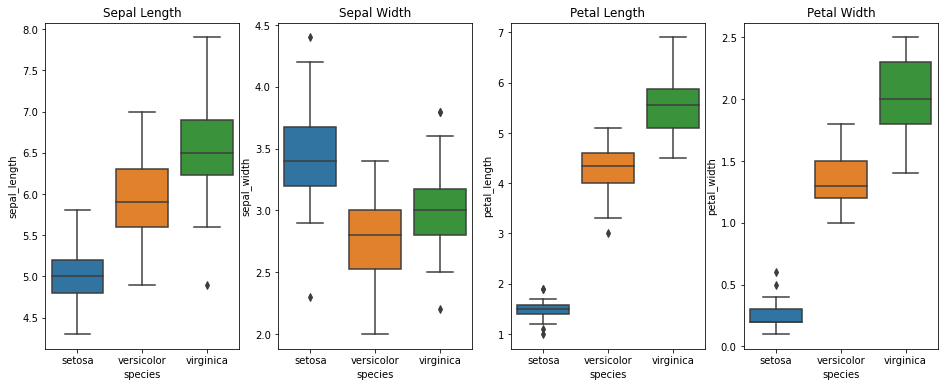

In [195]:
fig, ax = plt.subplots(1,4, figsize=(16, 6))
plt1 = sns.boxplot(x=iris.species, y=iris.sepal_length, ax=ax[0]).set_title(
'Sepal Length')
plt2 = sns.boxplot(x=iris.species, y=iris.sepal_width, ax=ax[1]).set_title(
'Sepal Width')
plt1 = sns.boxplot(x=iris.species, y=iris.petal_length, ax=ax[2]).set_title(
'Petal Length')
plt2 = sns.boxplot(x=iris.species, y=iris.petal_width, ax=ax[3]).set_title(
'Petal Width')

# Exercises Part 2

### 1. Using the lesson as an example, use seaborn's `load_dataset` function to load the `anscombe` data set. Use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset. What do you notice?
* There is the same sample size in each x, y parameters and the dataset in x seems to be almost identical except in dataset IV. The data of y has almost the exact same mean and std, but the min and maxes are different for y var.

In [221]:
anscombe = sns.load_dataset('anscombe')
anscombe.groupby('dataset')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### 1a. Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

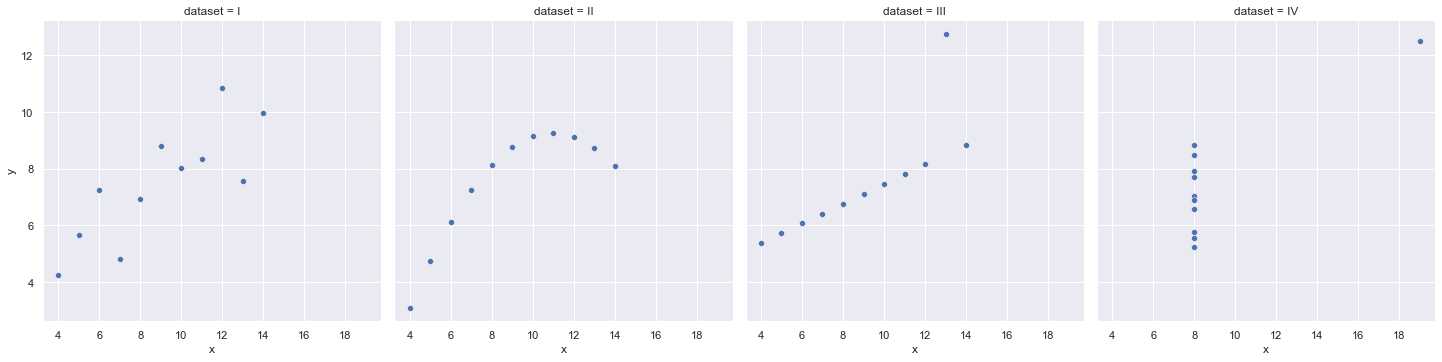

In [244]:

sns.relplot(x='x', y='y', col='dataset', data=anscombe)
plt.show()

### 2. Load the `InsectSprays` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

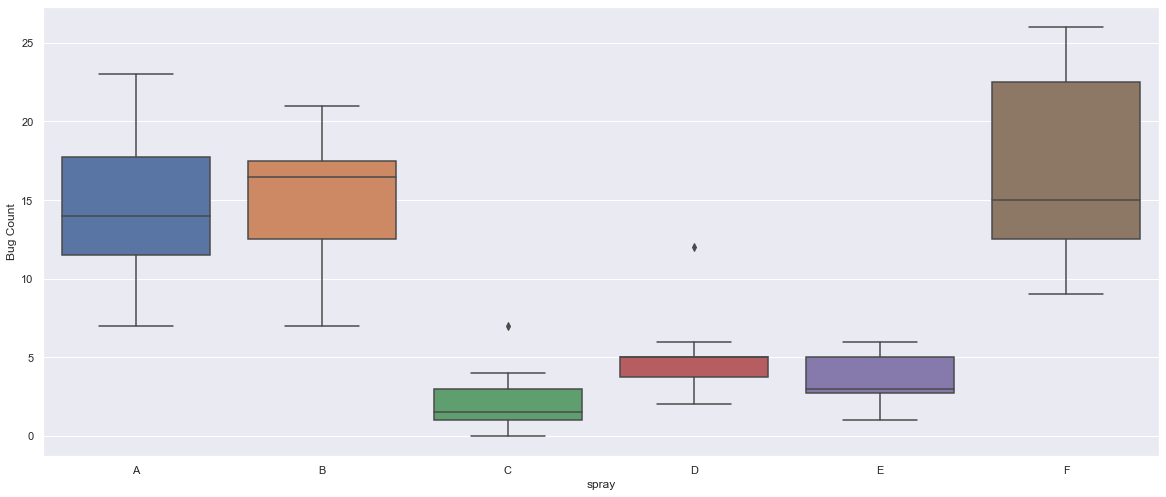

In [266]:
ins = data('InsectSprays')
sns.boxplot(data=ins, y='count', x='spray')
plt.ylabel('Bug Count')
plt.show()


### 3. Load the `swiss` dataset and read it's documentation. Create visualizations to answer the following questions:

In [415]:
swiss = data('swiss')


### 3a. Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [287]:
# Cutoff for which area is considered NOT catholic will be anything less than 40%
cs = swiss.assign(is_catholic = swiss.Catholic>=40)

### 3b. Does whether or not a province is Catholic influence fertility?
* It seems that if the province is Catholic then it's fertility is higher.

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

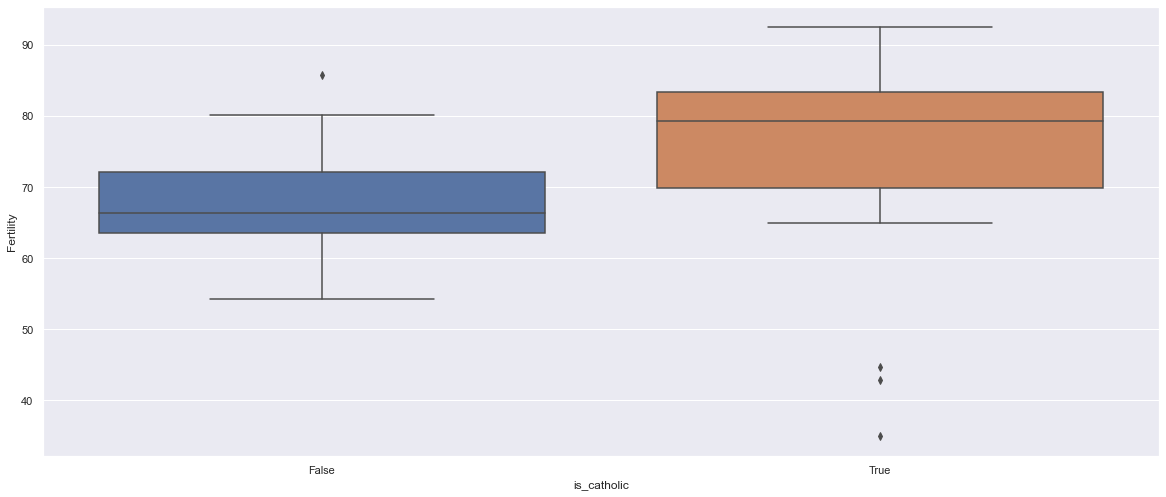

In [289]:
sns.boxplot(data=cs, x='is_catholic', y='Fertility')

### 3c. What measure correlates most strongly with fertility?

* It seems that being predominatly Catholic is correlated to a higher level of Fertility within the population.


In [307]:
corr = swiss.corr()
corr
# sns.heatmap(corr)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

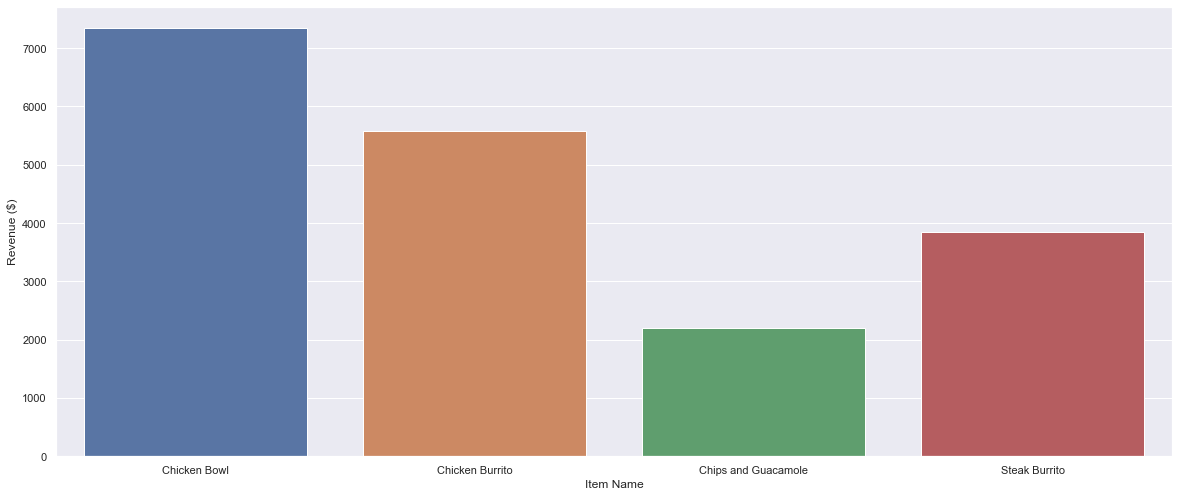

In [416]:
from env import user, password, host

def get_db_url(username: str, hostname: str , password: str, database_name: str):
    '''
    Takes username, hostname, password and database_name and 
    returns a connection string
    '''
    connection = f'mysql+pymysql://{username}:{password}@{hostname}/{database_name}'
    
    return connection

conn = get_db_url(username=user, password=password, hostname=host, database_name='chipotle')
sql = '''
select *
from orders'''
chipotle = pd.read_sql(sql, conn)

# This is to determine the most popular items as it will be determined by their fequency
popular_items = pd.DataFrame(chipotle.item_name.value_counts().head(n=4)).reset_index()

# Renames the columns to more accurate descriptions
popular_items.rename(columns={'index':'item_name', 'item_name': 'count'}, inplace=True)

# Formats the item price to a float so mathematical operators can be performed.
chipotle.item_price.replace('[\$,]', '', regex=True, inplace=True)
chipotle.item_price = chipotle.item_price.astype(float)

# Creates new DataFrame with only the 4 most popular items in it from original DataFrame
all_popular_items = chipotle[chipotle.item_name.isin(popular_items.item_name)]

# Groups all popular items together and then calculates the aggregate sum of all those amounts
item_total = all_popular_items.groupby('item_name').item_price.agg(['sum']).reset_index()

#Plots the barcharts by item name and their respective sum, and labels the charts.
sns.barplot(x='item_name', y='sum', data=item_total)
plt.xlabel('Item Name')
plt.ylabel('Revenue ($)')
plt.show()

### 4. Load the `sleepstudy` data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

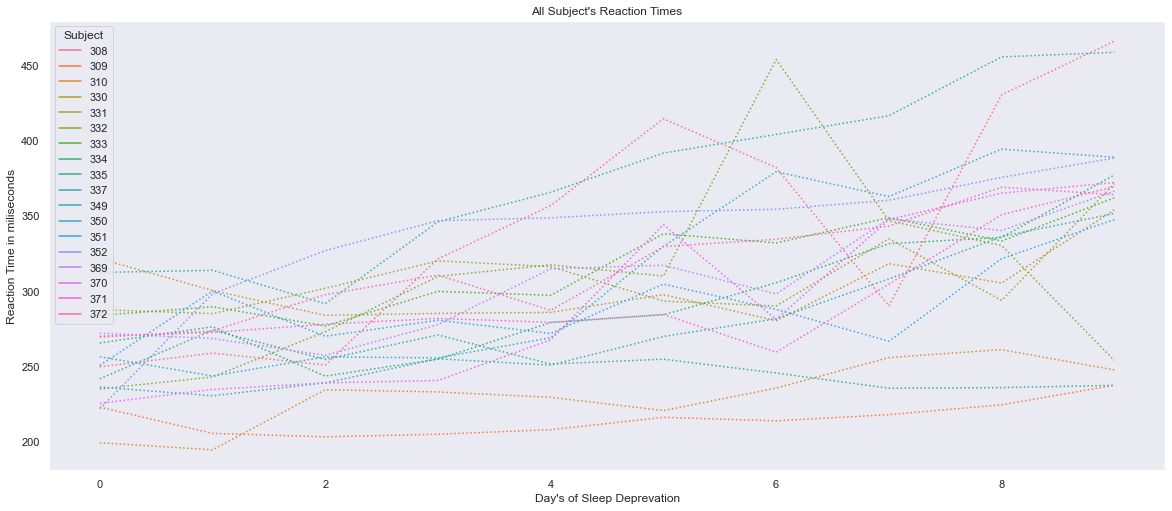

In [507]:
sleepstudy = data('sleepstudy')
sleepstudy.Subject = sleepstudy.Subject.astype(str)
sns.lineplot(data=sleepstudy, x='Days', y='Reaction', hue='Subject', linestyle=':',)
plt.title("All Subject's Reaction Times")
plt.xlabel("Day's of Sleep Deprevation")
plt.ylabel("Reaction Time in miliseconds")
plt.show()

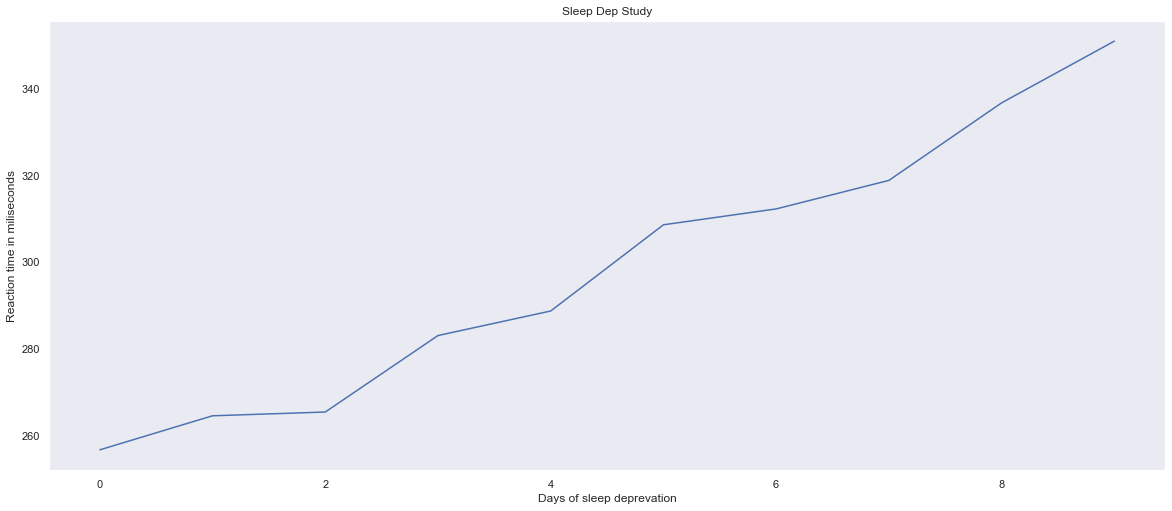

In [515]:
avg_reaction = sleepstudy.groupby(sleepstudy.Days).Reaction.agg(['mean'])
sns.lineplot(data=avg_reaction, x='Days', y='mean')
plt.ylabel('Reaction time in miliseconds')
plt.xlabel('Days of sleep deprevation')
plt.title('Sleep Dep Study')
plt.show()